# Pandas操作(表操作)

Python第一回目はいかがだったでしょうか。<br>
リストの扱いなどでは、「'T->U' や 'わ->は' の置き換えは、手作業の方が早そう」など、<br>
思うところはあったと思います。<br><br>

今回の表操作も、「Excelなら直感的に、簡単にできるのに」と感じる場面があるかと思います。<br>
慣れるまでは大変ですが、慣れてしまえばExcelよりもずっと楽に解析を行えます。<br><br>

焦らず、まずは今回の第8回目で体験して頂けたら幸いです。

今回は、渡邉先生の講義、<br>
【入門コース】6回目「【R】Rを用いた統計解析の実際」（2024年度）<br>
で取り上げられていたデータを中心に、Pythonで操作をしてみます。<br><br>

まだ受講されていない方は、先に受講してから今回の作業を開始することをオススメします。<br><br>

# 0. import

import: Rではlibrary()にあたる・
外部のモジュールやライブラリを取り込み、ここで使えるようにする。

```python
import ライブラリ名
```
また、import ライブラリ名 as 省略名 にすると、便利

In [1]:
import pandas as pd

Rの場合、`library(ggplot2)`をすると、`ggplot`や`labs`、`geom_vline`などが<br>
使えるようになりますが、Pythonの場合、`pd.read_csv`や`plt.scatter`など、`ライブラリ名.関数名`で指定するのが通例です。

# 1. csvファイルの読み込み

講義内で解説します。<br>
`Google Driveに保存 -> Colabにマウント -> /content/drive へ読みに行く`<br><br>
や、
```python
from google.colab import files
uploaded = files.upload()
```

という方法もあります。

### ちなみに、、、
Rと同じ様に、Excel形式のデータで空白の行や列がある場合や、不規則な並びをしている場合は、<br>
事前に整えておく必要があります。<br>
<br>
渡邉先生の講義（6回目「【R】Rを用いた統計解析の実際」）をご参照ください。<br>
今回は事前に整えておきましたので、気にするありませんが、頭の中に入れておいて下さい。
<br>
![](../img/import_csv_format.png)

# 2. 例題1(列・行の指定)

In [28]:
example_1 = pd.read_csv("../data/csv/example-1-1.csv")
example_1

,出席番号,国語,数学
0,1,89,80
1,2,93,91
2,3,61,84
3,4,89,79
4,5,86,77
5,6,81,77
6,7,79,89
7,8,91,69
8,9,70,71
9,10,75,81


### 列の取得

```python
# pd.Seriesとして取得(1列のみ)
dataframe["列名"]

# データフレームの一部として取得(複数列 可)
dataframe[["列名1"...]]
```

In [3]:
# 出席番号のSeriesを取得
example_1["出席番号"]

0     1
1     2
2     3
3     4
4     5
5     6
6     7
7     8
8     9
9    10
Name: 出席番号, dtype: int64

In [4]:
# 出席番号 と 国語の 2列 を取得
example_1[["出席番号", "国語"]]

,出席番号,国語
0,1,89
1,2,93
2,3,61
3,4,89
4,5,86
5,6,81
6,7,79
7,8,91
8,9,70
9,10,75


### 行の取得

行と同様。ただし、.loc を使用する。

```python
dataframe.loc["列名"]
```

```python
dataframe.loc[["列名1"...]]
```

In [5]:
# 行名が0の行のSeriesを取得
example_1.loc[0]

出席番号     1
国語      89
数学      80
Name: 0, dtype: int64

In [6]:
# 行名が0,1,2の行のデータフレームを取得
example_1.loc[[0, 1, 2]]

,出席番号,国語,数学
0,1,89,80
1,2,93,91
2,3,61,84


In [7]:
# スライスも使えます
example_1.loc[0:5]

,出席番号,国語,数学
0,1,89,80
1,2,93,91
2,3,61,84
3,4,89,79
4,5,86,77
5,6,81,77


「行名指定」の`loc`に似た、`iloc`を使って「行番号」を指定することもできます。よりこんがらがるので、今回は触れないでおきます。

### 列名の変更
日本語での操作は、文字化けのリスクなどがあります。<br>
対策はありますが、できれば列・行名は英語にする方が無難です。<br><br>

```python
after_df = before_df.rename(
    columns={"旧列名1": "新列名1", "旧列名2": "新列名2"},
    index={"旧行名1": "新行名1", "旧行名2": "新行名2"}
)
```

※ columns, index どちらか１つでもOKで

In [14]:
translate_dict = {"出席番号": "account_num", "国語": "Japanese", "数学": "Math"}

example_1_renamed = example_1.rename(columns=translate_dict)

# account_numを行名にする。
example_1_renamed = example_1_renamed.set_index("account_num")
example_1_renamed

,Japanese,Math
account_num,,
1,89,80
2,93,91
3,61,84
4,89,79
5,86,77
6,81,77
7,79,89
8,91,69
9,70,71


## 3. 箱ひげ図(boxplot)の表示

In [15]:
# 作図をするライブラリをインポート
# (Google Colab にはデフォルトでインストールされているハズです。インストールする際は、ターミナルで`pip install matplotlib seaborn``)
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

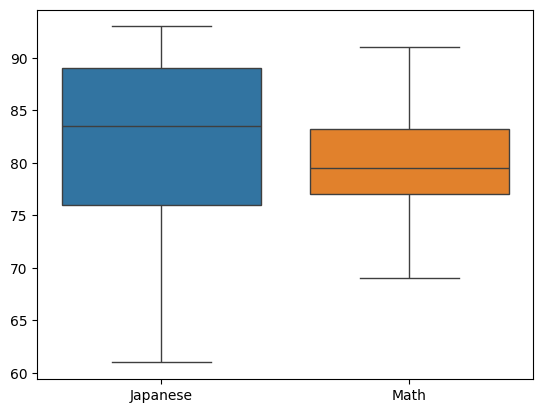

In [19]:
# https://seaborn.pydata.org/generated/seaborn.boxplot.html

sns.boxplot(data=example_1_renamed)
plt.show()

---
シンプルなデータなら、seabornの関数に突っ込むだけでできる。<br>
が、下のような性別などを入れたで、別々に表示などがしたい場合、先程の表の形式ではできない。
![](../img/boxplot_with_sex.png)

In [61]:
# 性別を入れたデータ(example-1-2.csv)を読み込む
# `index_col=列番号` で、行名となる列を指定できる。

example_1_2 = pd.read_csv("../data/csv/example-1-2.csv", index_col=0)
example_1_2

,Japanese,Math,sex
account_num,,,
1,89,80,M
2,93,91,W
3,61,84,M
4,89,79,W
5,86,77,M
6,81,77,W
7,79,89,M
8,91,69,W
9,70,71,M


In [62]:
# 整然データに直す(tidyデータ)
## ※個々の変数が１つの列にまとまったような形式

example_1_2_tidy = example_1_2.melt(
    # 質的変数として使う(残す)列を指定
    id_vars=["sex"],
    # 量的変数として扱う(まとめる)列を指定
    value_vars=["Japanese", "Math"],
    # (optional) 新しく追加される、量的変数の 「カテゴリ名」と「数値」の列名を決める。
    var_name="subject", value_name="score"
)

example_1_2_tidy

,sex,subject,score
0,M,Japanese,89
1,W,Japanese,93
2,M,Japanese,61
3,W,Japanese,89
4,M,Japanese,86
5,W,Japanese,81
6,M,Japanese,79
7,W,Japanese,91
8,M,Japanese,70
9,W,Japanese,75


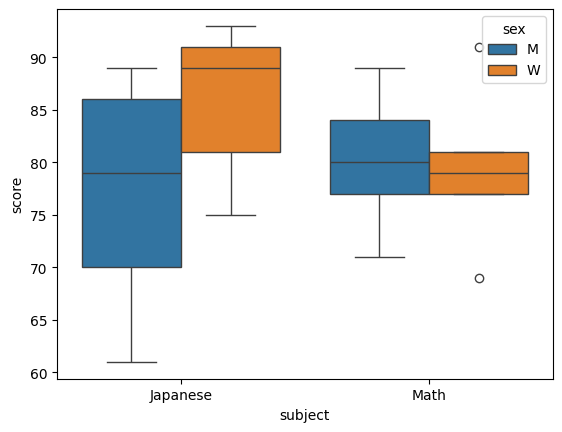

In [63]:
sns.boxplot(data=example_1_2_tidy, x="subject", y="score", hue="sex")
plt.show()

# 4. 簡単な統計量

In [43]:
example_2 = pd.read_csv("../data/csv/example-2-1.csv", index_col=0)
example_2

,Japanese,Math,English,Science
account_num,,,,
1,89,80,84,90
2,93,91,61,100
3,61,84,90,97
4,89,79,77,82
5,86,77,57,85
6,81,77,66,71
7,79,89,65,91
8,91,69,78,98
9,70,71,88,94


In [77]:
example_2.sum()

Japanese    814
Math        798
English     691
Science     891
dtype: int64

In [78]:
example_2.sum(axis=1)

account_num
1     343
2     345
3     332
4     327
5     305
6     295
7     324
8     336
9     323
10    264
dtype: int64

In [79]:
example_2.mean(axis=1)

account_num
1     85.75
2     86.25
3     83.00
4     81.75
5     76.25
6     73.75
7     81.00
8     84.00
9     80.75
10    66.00
dtype: float64

In [80]:
example_2.describe()

,Japanese,Math,English,Science
count,10.000000,10.00000,10.00000,10.00000
mean,81.400000,79.80000,69.10000,89.10000
std,10.308572,6.98888,19.26684,8.94986
min,61.000000,69.00000,25.00000,71.00000
25%,76.000000,77.00000,62.00000,83.50000
50%,83.500000,79.50000,71.50000,90.50000
75%,89.000000,83.25000,82.50000,96.25000
max,93.000000,91.00000,90.00000,100.00000


In [82]:
example_2.sort_values(by="Math", ascending=False)

,Japanese,Math,English,Science
account_num,,,,
2,93,91,61,100
7,79,89,65,91
3,61,84,90,97
10,75,81,25,83
1,89,80,84,90
4,89,79,77,82
5,86,77,57,85
6,81,77,66,71
9,70,71,88,94


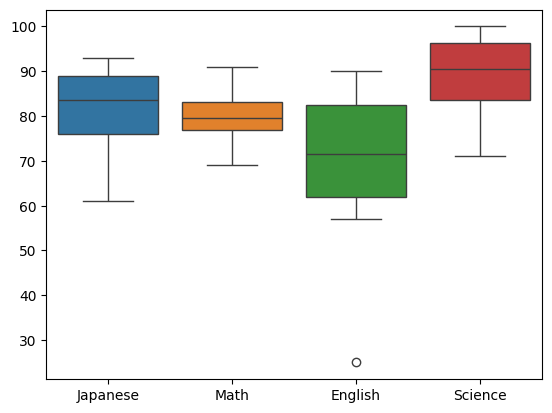

In [46]:
sns.boxplot(data=example_2)
plt.show()

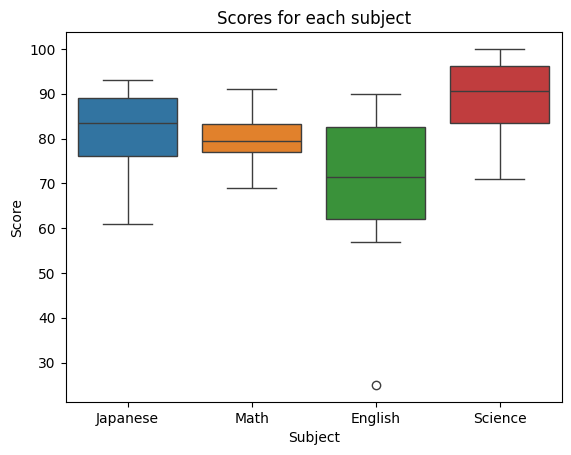

In [75]:
sns.boxplot(data=example_2)

plt.title("Scores for each subject")
plt.xlabel("Subject")
plt.ylabel("Score")
plt.show()

# 演習問題1

`example-2-2.csv`を読み込み、以下のような箱ひげ図を描いてください。<br>
- pd.read_csv() で読み込み
- データ.melt() でtidyデータにする。
- sns.boxplot() で可視化

![](../img/boxplot_with_sex_2.png)

# 5. 散布図

`example_1_2`のデータを使い、国語の点数と数学の点数の相関を見てみましょう。

In [85]:
example_1_2

,Japanese,Math,sex
account_num,,,
1,89,80,M
2,93,91,W
3,61,84,M
4,89,79,W
5,86,77,M
6,81,77,W
7,79,89,M
8,91,69,W
9,70,71,M


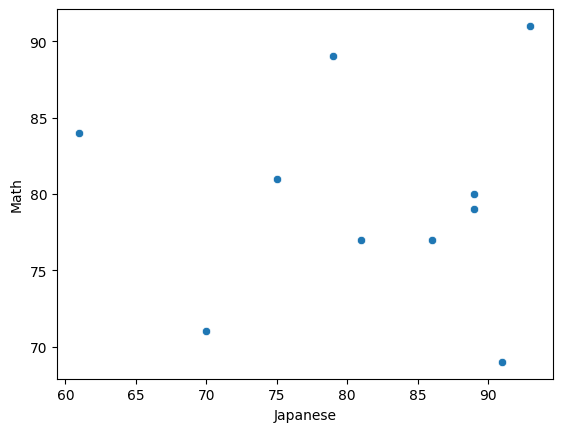

In [88]:
sns.scatterplot(data=example_1_2, x="Japanese", y="Math")

plt.show()